# COGS 108 - Final Project - Group 007

## Overview
For our project, we were curious in seeing how much music has changed in terms of the explicit language. Our strategy for determining this is to analyze from multiple angles the explicit language used in songs from Billboard’s Top 100 singles from 1960 to 2019. From the data we scraped and plots we charted, we were able to observe and conclude that explicit language in songs has steadily increased in usage as time has progressed, yet inconclusive as to whether explicit language does affect how a song may chart in terms of rank.


## Names
- Jeremiah Alindogan
- Sean Dao
- Evelynne Lee
- Jack Sun
- Winnie Wang

## Research Question: 
----
In the last 60 years of music, how has the amount of explicit language used changed in the top 100 songs each year? Does genre influence the amount of explicit language in a song? 


## Background and Prior Work
----
Music plays an important role in adolescents and children in their social development. Listening to popular music is part of growing up. We categorized a song as popular if it made it to the Billboard Year End Top 100 songs list of each year. Music may have an association with the behaviors and emotions of children and adolescents as they grow up and may even have a negative effect.

There is a concern related to the lyrics of some genres of music and their effect on children and adolescents. With music being so easily accessible on various streaming platforms this may become a concern to parents and what their children are listening to. Social media and peers also affect the type of music and what songs they listen to. The more popular a song is, the bigger the audience of listeners.

The amount of explicit songs in the Top 100 continue to rise each year but we want to know just how much that increase is from year to year.
As for prior work that has been done on a query similar to ours, “The Evolution of Music Genre Popularity” referenced below includes data visualizations of how popular each music genre was in the Billboard Hot 100 rankings from 1958 to 2016. The popularity is based on how many songs in the Hot 100 are categorized under a genre. We believe that this dataset provides valuable insight into our data analysis and we wanted to include it as one of the datasets that we cross reference our results with.


References:

1) https://pediatrics.aappublications.org/content/124/5/1488

2) https://www.newsweek.com/songs-explicit-lyrics-popular-increase-billboard-spotify-583551

3) https://thedataface.com/2016/09/culture/genre-lifecycles


## Hypothesis
-----
From our own observation of how popular music changed over our lifetime, our main hypothesis is that the amount of explicit language has increased in the last 60 years of pop music.  In regards to the genre of a song, our hypothesis is that hip hop and rap will have the most explicit lyric content. Hip hop and rap songs tend to be more expressive and aggressive therefore we believe that songs categorized in those two genres will exhibit more explicit language.


## Dataset(s)
-----
#### Dataset Name: Wikipedia Billboard Top 100 1960- 2019 (Song, Rank, Artist, Year)
- Link to the dataset: https://en.wikipedia.org/wiki/Billboard_Hot_100
- Number of observations: 6001
- The data we use to answer our question are Billboard’s Top 100 songs for each year over 60 years from 1960-2019. Each year includes a table with 100 songs and each song is described by the features song name, rank, artists, and year. In total, there are 6001 total observations although we only expected to have 6000 observations. The extra observation can be attributed to the fact that there was a tie in rank during one of the years. 



#### Dataset Name: Genius
- Link to the dataset: https://genius.com/
- Number of observations: 6001
- To be able to analyze the songs for explicit language, we need the lyrics for these songs. In order to do this, we used the Genius API which gives us access to the Genius Database containing songs as well as the corresponding lyrics. Working with the API allowed us to find the correct URLs to scrape from by making a request with the song titles and artists that we have extracted from the billboard top 100. We did this for 6001 songs, resulting in 6001 lyrics.



#### Dataset Name: swearWords.csv
- Link to the dataset: http://www.bannedwordlist.com/
- Number of observations: 91
- Finally, we need a dictionary of swear words and other explicit language that we would search for in each of the song’s lyrics. We found a csv containing a total of 86 swear words online. We noticed some variations of certain swear words were missing, so we added these in ourselves. The final list of swear words which we saved back into the csv totaled to 91.



To combine all this information, we decided to store all relevant song information into a dataframe with each song representing the row and the corresponding features in the columns. The swear words were placed into a list.


## Setup
----
There are two API's we used:

#### Lyric Genius by John W. Miller
   - Reference: https://github.com/johnwmillr/LyricsGenius
   
#### Spotipy by Spotify
   - Reference: https://spotipy.readthedocs.io/en/2.12.0/

In [37]:
# General Imports
from bs4 import BeautifulSoup as bs
import bs4
import pandas as pd
import numpy as np

# for files
import csv
import json

# APIs
import requests
import lyricsgenius # Genius
import spotipy # Spotify
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
# SPOTIFY CREDENTIALS
# export SPOTIPY_CLIENT_ID= a6b716db8e664f47bf5b84d73cdae1e4
# export SPOTIPY_CLIENT_SECRET= ----- 🤫 

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")

# for data cleaning
from string import digits, punctuation

# for displaying external image
from IPython.display import Image

# for turning a string into a list
from ast import literal_eval

# I/O
import os
# Search and manipulate strings
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jalindog/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Cleaning
-----

We need to read the datasets we have gathered into a pandas dataframe. 
As there seemed to be no csv’s with all the information we needed, we had to create our own web scraper. 

We started with the wikipedia datasets and scraped the song name, rank, year, and artists from each year. 
The web scraper visits the wikipedia page of the billboard top 100 for each year and extracts these necessary components. 

We placed all this information into a dataframe with song names as rows and each feature as a column. 
As mentioned before, there are 6001 songs since there was a tie in one of the years. 
We note that this may affect our results slightly but with minimized impact in our analysis.

We placed all the code and steps we actually ran in coding_notebook.ipynb.

**NOTE**: We use the term **curse percent** frequently which means the percentage of curse words in a song.


### Web Scraping and Creating df_curse
We started with the wikipedia datasets and scraped the song name, rank, year, and artists from each year into separate lists. The web scraper visits the wikipedia page of the billboard top 100 for each year and extracts these necessary components.

We then created **df_curse**:
- df_curse is a dataframe that contains the information about every song from the Billboard Top 100 for the past 60 years from Wikipedia. It  contains song rank, song title, song artist, and the year that the song came out. This also where we store the lyrics for the appropriate song, the number of curse words, the number of words, the curse word percentage of that song, and the genres list for each song; we calculate these values in the next cells. We obtained this dataframe by consolidating the arrays that contain the webscraped song information from Wikipedia into a single dataframe and set appropriate column labels.

Using the previously made list of songs and list of artists, we iterated through each, placing them in a search query to the lyricsgenius, a Python client for Genius API. Using lyricsgenius and a for loop indexing through the size of the song list, we could grab lyrics for each song in df_curse. As we were grabbing lyrics, we also cleaned the lyrics - making the lyrics all lowercase for easier searching, taking out any unnecessary words like “Verse”, removing unnecessary punctuation, and removing digits. We stored each cleansed lyric into a list of lyrics. Once the loop was finished, we added the list as a column to df_curse.

For ease, we created a csv to store the values of df_curse and its webscraped content into *df_curse.csv*.

### Calculating Values and Storing into df_curse 
#### Number of Curse Words, Number of Words, Curse Word Percentage, and Genres List for Every Song

##### Counting the Curse Words and Total Words
Next, we counted the number of curse words in every song's lyrics and the number of total words, then stored them into df_curse. To do this we used NLTK and a filter for swear words. The words we used in our filter can be found *swearWords.csv*.

In this section, we created count_curse() to get the curse word total and total words for every song as a pair. Then we split the pair column into two separate columns and add them to df_curse. 

In [ ]:
# set up curse word list
curse_data = ""
with open('swearWords.csv') as csvfile:
    curse_data = list(csv.reader(csvfile))
curse_data = curse_data[0]

In [ ]:
# get amount of curse words in a song, and it's total amount of words ~ (curse, total)
def count_curse(string):
    
    temp = word_tokenize(str(string))
    # get total number of words
    total = len(temp)
    curse_total = 0
    for i in curse_data:
        curse_total = curse_total + temp.count(i)
    
    return curse_total, total

df_curse['curse, total'] = df_curse['lyrics'].apply(count_curse)

# split the pairs, and drop the original
df_curse[['# of curse words', '# of words']] = pd.DataFrame(df_curse['curse, total'].tolist(), index=df_curse.index)
df_curse = df_curse.drop(columns=['curse, total'])

##### Finding the Curse Word Percentage Per Song
The following cell contains a function getAverageCurse(), which calculates a song's ratio of curse words to the total number of words that it has. It takes two parameters, total - the total number of words in the song, and curseWords - the number of curse words in the song. Within the same cell, we use the function to get the percentage of curse words in each song in the df_curse dataframe.

In [ ]:
#find average curse words for every song and for each year
#average curse words per song
def getAverageCurse(total, curseWords):
    try:
        ave = curseWords/total
        return (curseWords/total) * 100
    except:
        print('Division Error')
        
#place average curse words per song into dataframe
# df_curse = pd.DataFrame(columns = ['song', 'year', 'percent_curse', 'percent_curse_year', 'curse ratio'])
# df_curse['song'] = df_curse['song']
# df_ave['year'] = master_df['year']
df_curse['percent_curse'] = getAverageCurse(df_curse['# of words'], df_curse['# of curse words'])

###### Getting List of Genres for Every Song
Using Spotify API Python Client - Spotipy

To get a list of genres for every song in our dataframe, we used the Spotipy API to look up each song in the Spotify song directory to obtain the genres that it belongs to. In the following cell, we created a copy of 'df_curse' called 'df' and intially setting up an empty new column called Genres. Afterwards, we use the Spotipy API. We do this by iterating through each row in the dataframe to grab the song information, cleaning up that information to create a search query, grabbing the list of genres that is part of the song's metadata in Spotify, and then inserting that list into the song's respective genre cell in 'df'.

In [ ]:
# genrefinder.py

CLIENT_ID="CLIENT ID"
CLIENT_SECRET="CLIENT SECRET 🤫" # Paste Client Secret and Client ID

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
                                client_id=CLIENT_ID,
                                client_secret=CLIENT_SECRET))

# rank    song    artist    year    lyrics    curse_num    word_num
df = df_curse
df['genres'] = ""

print("running...")

# attach list of genres to every song
for index, row in df.iterrows():
    genres = []

    # get rid of 'featuring'
    artist = str(row['artist'])
    x = artist.find("featuring")
    if (x > -1):
        artist = artist[:x-1]

    # get rid of 'featuring'
    x = artist.find(" and ")
    if (x > -1):
        artist = artist[:x]

    # get rid of 'featuring'
    x = artist.find(" & ")
    if (x > -1):
        artist = artist[:x]
    
    try:
        artist_response = spotify.search(artist, type='artist', market='US')
    except:
        print("no artist found")
    print(str(index) + " " + artist + " " + row['song'])

    try:
        genres = artist_response['artists']['items'][0]['genres']
        print(genres)
        df.at[index,'genres'] = genres
    except:
        df.at[index,'genres'] = np.nan
        print("no genres found for this")

print("done")

###### Resulting df_curse 

In [9]:
# df_curse.csv holds the information on df_curse
df_curse = pd.read_csv("df_curse.csv")
df_curse = df_curse.rename(columns={
    'rank': 'Rank',
    'song': 'Song',
    'artist': 'Artist',
    'year': 'Year',
    'lyrics': 'Lyrics',
    '# of curse words': 'Total Curse Words',
    '# of words': 'Total Words',
    'percent_curse':'Curse Percent',
    'genres': 'Genres'})
df_curse

,Rank,Song,Artist,Year,Lyrics,Total Curse Words,Total Words,Curse Percent,Genres
0,1,Theme from A Summer Place,Percy Faith,1960,there's a summer place where it may rain or st...,0,108,0.000000,"['adult standards', 'easy listening', 'lounge']"
1,2,He'll Have to Go,Jim Reeves,1960,put your sweet lips a little closer to the ph...,0,164,0.000000,"['adult standards', 'nashville sound']"
2,3,Cathy's Clown,The Everly Brothers,1960,don't want your love any more don't want your...,0,176,0.000000,"['adult standards', 'brill building pop', 'bub..."
3,4,Running Bear,Johnny Preston,1960,on the bank of the river stood running bear yo...,0,226,0.000000,"['brill building pop', 'deep adult standards',..."
4,5,Teen Angel,Mark Dinning,1960,teen angel teen angel teen angel that fatef...,0,112,0.000000,[]
...,...,...,...,...,...,...,...,...,...
5996,96,Eyes on You,Chase Rice,2019,we've been to both carolinas seen a big monta...,1,353,0.283286,"['contemporary country', 'country', 'country r..."
5997,97,All to Myself,Dan + Shay,2019,i'm jealous of the blue jeans that you're wea...,0,291,0.000000,"['contemporary country', 'pop']"
5998,98,Boyfriend,Ariana Grande,2019,i'm a motherfuckin' train wreck i don't wanna...,2,520,0.384615,"['dance pop', 'pop', 'post-teen pop']"
5999,99,Walk Me Home,Pink,2019,there's somethin' in the way you roll your ey...,0,273,0.000000,"['album rock', 'art rock', 'classic rock', 'pr..."


### Creating df_curse_year

**df_curse_per_year** is a dataframe that contains data for how many curse words appear in the Billboard Top 100 songs for each year. In addition, it keeps track of the total words in all the songs in the Top 100 list to calculate an average percentage of curse words from the ratio of curse words to total words.

###### Average Curse Word Percentage for Each Year

The following cell calculates the average curse word percentage for each year's Billboard Top 100 songs. 

We do this by creating a dictionary called 'ave_dict' that groups all the songs from the same year together and calculating the mean of those songs''percent_curse' column values. Afterwards, we transfer the information from 'ave_dict' to a dataframe called 'df_curse_per_year' so that we can better organize our information under column labels. 

We then create a temporary dataframe called 'df_temp' to hold the total number of curse words in each year's Top 100 songs.

From here, we concatenate 'df_curse_per_year' and 'df_temp' to consolidate the information into 'df_curse_per_year'. We get rid of the 'percent_column' and then the resulting dataframe will contain each year from 1960 to 2019, the respective year's total number of curse words, the respective year's total number of words, and then the respective year's average curse word percentage.

In [ ]:
#make dictionary for average curse words per year
ave_dict = df_curse.groupby(['year']).mean().to_dict()['percent_curse']

df_curse_per_year = pd.DataFrame.from_dict(ave_dict, orient='index').reset_index()
df_curse_per_year.columns = ['year', 'percent_curse_year']

# counting total curse words and total words
df_temp = df_curse.groupby(['year']).sum().reset_index()
df_temp = df_temp.drop(columns=['year'])

# set up
df_curse_per_year = pd.concat([df_curse_per_year.reset_index(drop=True),df_temp.reset_index(drop=True)], axis=1)
df_curse_per_year = df_curse_per_year.drop(columns=['percent_curse'])
df_curse_per_year = df_curse_per_year[['year', '# of curse words', '# of words', 'percent_curse_year']]
df_curse_per_year

##### Counting the Number of Songs with Curse Words for Each Year

In the following cell we calculate how many songs contain curse words for each year represented in the dataframe. To do this, we created two helper functions: 'has_curse_words' and 'digit_sum'. 

'has_curse words' checks the column value of '# of curse words' for each song and returns a 1 or 0 to represent whether or not a song contains curse words. 'digit_sum' returns the sum of numbers in a string. 

In the 'df_curse' dataframe, we create a column called 'has_curse' to hold the value returned by 'has_curse_words' for each song. From here, we group the rows in 'df_curse' by year and then compiling each year's 'has_curse' value into one long bit string for each year's Top 100 songs. 

We then use the 'digit_sum' function to read through the bit string and add up the number of 1's in the bit string to obtain the total number of songs with curse words for each year. The sums are held in an array called 'curse_sum', which are then appended to 'df_curse_per_year' as a column called 'explicit songs'.

In [ ]:
# function for checking whether or not a song contains curse words
def has_curse_words(count):
    if (count > 0):
        return '1'
    else:
        return '0'
    
# helper function for getting the sum of digits in a string
def digit_sum(n):
    new_n = str(n)
    sum = 0
    for i in new_n:
        sum += int(i)
    return sum
    
df_curse['has_curse'] = df_curse['# of curse words'].apply(has_curse_words)

# create a new df that creates one row for each year
# compile the 'has_curse' value into one long string
df_temp = df_curse.groupby(['year'], as_index=False)['has_curse'].sum()

# list to hold the number of songs with curse words for each year
curse_sum = []

# iterate through each row and call digit_sum() on each 'has_curse' string to get the total number of songs 
# containing curse words for each year
for index, row in df_temp.iterrows():
    num_string = str(row['has_curse'])
    curse_sum.append(digit_sum(num_string))
    
# drop unnecessary columns in df_curse
df_curse = df_curse.drop(columns=['has_curse'])
    
# add the data as a new column in curse_df
df_curse_per_year['explicit songs'] = curse_sum
df_curse_per_year

##### Average Songs with Curse Words Per Year

To find the average songs with curse words for each year, we used the number of songs for each year, and divided the number of songs that had curse words that year by the number of songs of the same year.

In [42]:
#group by year and find unique entries
songs_per_year=df_curse.groupby('Year', as_index=False).nunique()

#find percent of curse songs in each year
df_curse_per_year['Average Year Curse Songs'] = df_curse_per_year['Songs with Curse Words']/songs_per_year['Song']
df_curse_per_year.to_csv("df_curse_per_year.csv", index=False)

###### Resulting df_curse_per_year

In [9]:
# df_curse_per_year.csv holds the information on df_curse_per_year
df_curse_per_year = pd.read_csv("df_curse_per_year.csv")
df_curse_per_year = df_curse_per_year.rename(columns={
    'year':'Year',
    '# of curse words': 'Total Curse Words',
    '# of words': 'Total Words',
    'percent_curse_year': 'Average Curse Percent Per Year', 
    'explicit songs': 'Songs with Curse Words'})
df_curse_per_year.head()

,Year,Total Curse Words,Total Words,Average Curse Percent Per Year,Songs with Curse Words,Average Year Curse Songs
0,1960,2,43819,0.000077,1,0.01
1,1961,5,19431,0.016320,4,0.04
2,1962,59,30652,0.013882,2,0.02
3,1963,5,38983,0.009707,4,0.04
4,1964,31,44497,0.022914,5,0.05


### Creating df_genre
'df_genre' is a dataframe that holds 'Genre' - the list of different genres represented in the dataframe of songs, 'Song Count' - the number of songs under each genre, 'RunSum' - a running sum of the average percent of curse words for each song in each genre, and 'AveCurse' - the average number of curse words used in each genre. The last column, 'AveCurse' is created by dividing the respective genre's value for 'RunSum' with the respective value from that genre's 'SongCount'.

Finally, we organize the information in 'df_genre' in order of most to least use of curse words in the list genres.

In [ ]:
# genrefinder2.py

df = df_curse

# # SET UP GENRE DF 
df_genre = pd.DataFrame(columns=['Genre', 'Song Count', 'RunSum', 'AveCurse'])

df['genres'].astype('object')

for index, row in df.iterrows():
    try:
        genres = literal_eval(row['genres'])
        for g in genres:

            # if genre is not in our dataframe
            if g in df_genre['Genre'].values:

                # # increment song count
                df_genre.loc[df_genre['Genre'] == g, 'Song Count'] += 1
                
                # # increment running sum
                df_genre.loc[df_genre['Genre'] == g, 'RunSum'] += row['percent_curse']
                
                # update 
                df_genre.loc[df_genre['Genre'] == g, 'AveCurse'] = df_genre.loc[df_genre['Genre'] == g, 'RunSum'] / df_genre.loc[df_genre['Genre'] == g, 'Song Count']
            # else we find the genre, and update values
            else:
                print(g)
                # print("adding" + g)
                df_genre = df_genre.append({'Genre': g, 'Song Count': 1, 'RunSum': row['percent_curse'], 'AveCurse': row['percent_curse']}, ignore_index=True)
    except: 
        print("Empty genres list")

df_genre = df_genre.sort_values('Song Count', ascending=False)

###### Resulting df_curse_per_year

In [15]:
# df_curse_per_year.csv holds the information on df_curse_per_year
df_genre = pd.read_csv("df_genre.csv")
df_genre = df_genre.rename(columns={'RunSum': 'Total Curse Perccent', 'AveCurse': 'Average Curse Percent' })
df_genre = df_genre.sort_values('Average Curse Percent',  ascending=False) 
df_genre

,Genre,Song Count,Total Curse Perccent,Average Curse Percent
485,comedy rap,1,5.864662,5.864662
416,bounce,2,8.716498,4.358249
277,houston rap,5,20.697922,4.139584
191,trap queen,11,45.325685,4.120517
228,emo rap,8,32.619518,4.077440
...,...,...,...,...
363,ska,3,0.000000,0.000000
362,celtic,3,0.000000,0.000000
361,australian country,3,0.000000,0.000000
360,bolero,3,0.000000,0.000000


## Data Analysis & Results

In order to analyze how the use of explicit language has changed within the top 100 songs of each year, we first scraped song name, rank, year, and artists from each year using the Wikipedia datasets and created a dataframe with the number of curse words in each song, the number of words per song, the percent of curse words, the percent of curse words in relation to that year, as well as the average curse word per song/year ratio.

In [30]:
df_curse.head()

,Rank,Song,Artist,Year,Lyrics,Total Curse Words,Total Words,Curse Percent,Genres
0,1,Theme from A Summer Place,Percy Faith,1960,there's a summer place where it may rain or st...,0,108,0.0,"['adult standards', 'easy listening', 'lounge']"
1,2,He'll Have to Go,Jim Reeves,1960,put your sweet lips a little closer to the ph...,0,164,0.0,"['adult standards', 'nashville sound']"
2,3,Cathy's Clown,The Everly Brothers,1960,don't want your love any more don't want your...,0,176,0.0,"['adult standards', 'brill building pop', 'bub..."
3,4,Running Bear,Johnny Preston,1960,on the bank of the river stood running bear yo...,0,226,0.0,"['brill building pop', 'deep adult standards',..."
4,5,Teen Angel,Mark Dinning,1960,teen angel teen angel teen angel that fatef...,0,112,0.0,[]


We created another dataframe that shows use the number of curse words per year and the total number of words in that specific year. 

In [44]:
df_curse_per_year.head()

,Year,Total Curse Words,Total Words,Average Curse Percent Per Year,Songs with Curse Words,Average Year Curse Songs
0,1960,2,43819,0.000077,1,0.01
1,1961,5,19431,0.016320,4,0.04
2,1962,59,30652,0.013882,2,0.02
3,1963,5,38983,0.009707,4,0.04
4,1964,31,44497,0.022914,5,0.05


We then created a dataframe that holds every type of genre in the list, with the number of songs of that genre, with the sum of curse percentages, and the average curse percent of that genre.

In [33]:
df_genre.head()

,Genre,Song Count,Total Curse Perccent,Average Curse Percent
0,dance pop,1339,398.682289,0.297746
1,pop,1230,382.759083,0.311186
2,soft rock,1203,31.144939,0.025889
3,mellow gold,1144,42.424049,0.037084
4,rock,874,48.191472,0.055139


In [34]:
df_genre.sort_values('Average Curse Percent',  ascending=False)

,Genre,Song Count,Total Curse Perccent,Average Curse Percent
485,comedy rap,1,5.864662,5.864662
416,bounce,2,8.716498,4.358249
277,houston rap,5,20.697922,4.139584
191,trap queen,11,45.325685,4.120517
228,emo rap,8,32.619518,4.077440
...,...,...,...,...
363,ska,3,0.000000,0.000000
362,celtic,3,0.000000,0.000000
361,australian country,3,0.000000,0.000000
360,bolero,3,0.000000,0.000000


### Number of Curse Words vs. Year

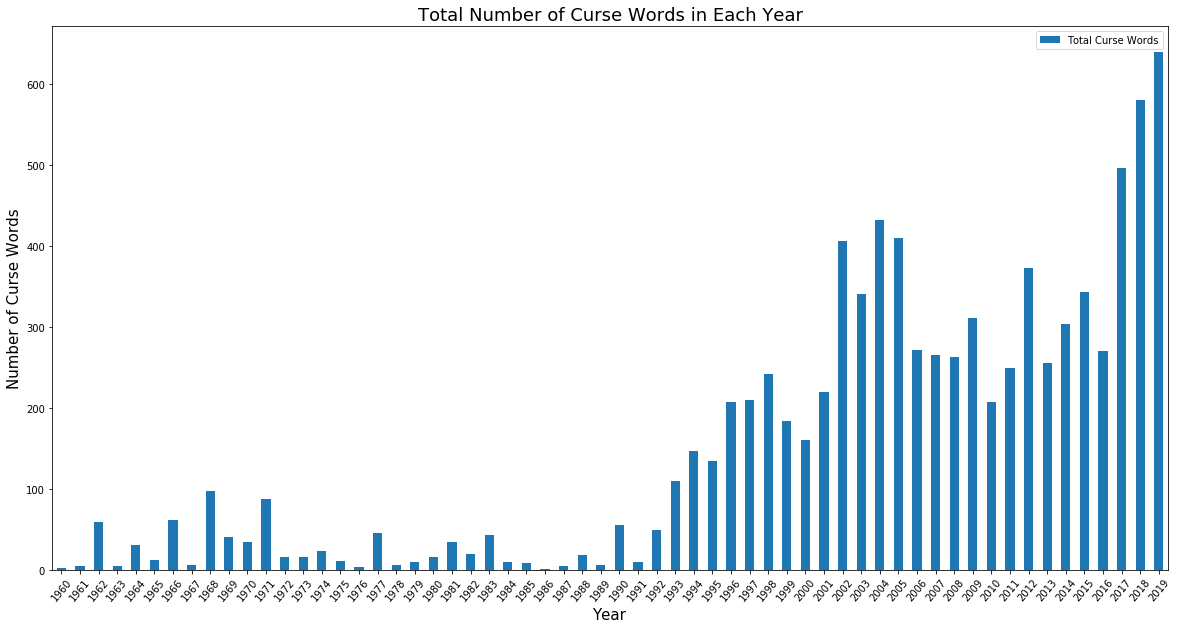

In [68]:
# Curse words per year (bar pot)
five_interval = list(range(1960,2019,5))
plt1 = df_curse_per_year.plot( figsize=(20,10), x ='Year', y='Total Curse Words', kind = 'bar', rot = 50)
plt1.set_title("Total Number of Curse Words in Each Year", fontsize = 18)
plt1.set_ylabel('Number of Curse Words', fontsize = 15)
plt1.set_xlabel('Year', fontsize = 15)
plt1

Here we wanted to see how many curse words were present in the Top 100 songs per year. 
From this bar graph, we are able to see that the number of curse words per year steadily increased within the past 60 years. This reinforces our hypothesis that the amount of explicit language has increased. 

There is quite a bit of variation in the beginning and we think that may be caused by events that happened during that period of time. Something could’ve caused widespread anger and musical artists channeled that anger into their songs.

We can start to see a rise in the number of curse words beginning in the early 1990s and continue to rise until the present, which is about the time when hip hop began to edge into pop culture. Particularly, we can see a spike in the number of curse words in the year 2004. We can also see in 2017 and then on a huge rise in the number of curse words per year and that could be from the rise of hip hop and rap songs into the top 100 charts, which will be further discussed in our later analysis.


### Average Curse Percent vs. Year 

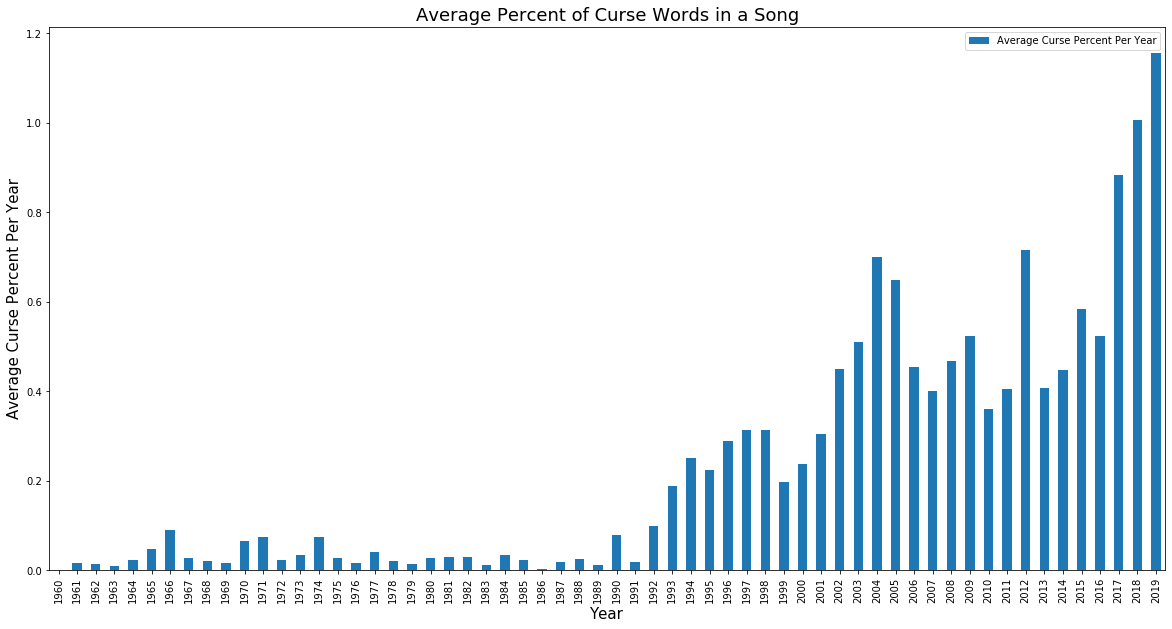

In [12]:
# Curse words per year (scatter plot)
plt2 = df_curse_per_year.plot(x ='Year', y='Average Curse Percent Per Year', figsize=(20,10), kind = 'bar')
plt2.set_title("Average Percent of Curse Words in a Song", fontsize = 18)
plt2.set_ylabel('Average Curse Percent Per Year', fontsize = 15)
plt2.set_xlabel('Year', fontsize = 15)
plt2

By finding the curse percent of a song, which is the ratio of curse words and the total number of words in a song, this gives a more accurate representation of the amount of explicit language in a song because we’ve factored in how many words are actually in a song. With this, we plotted the average curse percent against each year, and we see the same increasing trend of the amount of explicit language in a song per year, with a big increase in the average curse percent per year, or in other words, an increase in the average number of curse words in a song of that year. 

We can see the effects of averaging the percentage of curse words of songs from 1965 to 1975. In the previous graph, we can see the small spikes specifically in this range of years, which could be due to the rise of rock, which we will discuss in analysis.

### Curse Percent Per Song vs. Year 

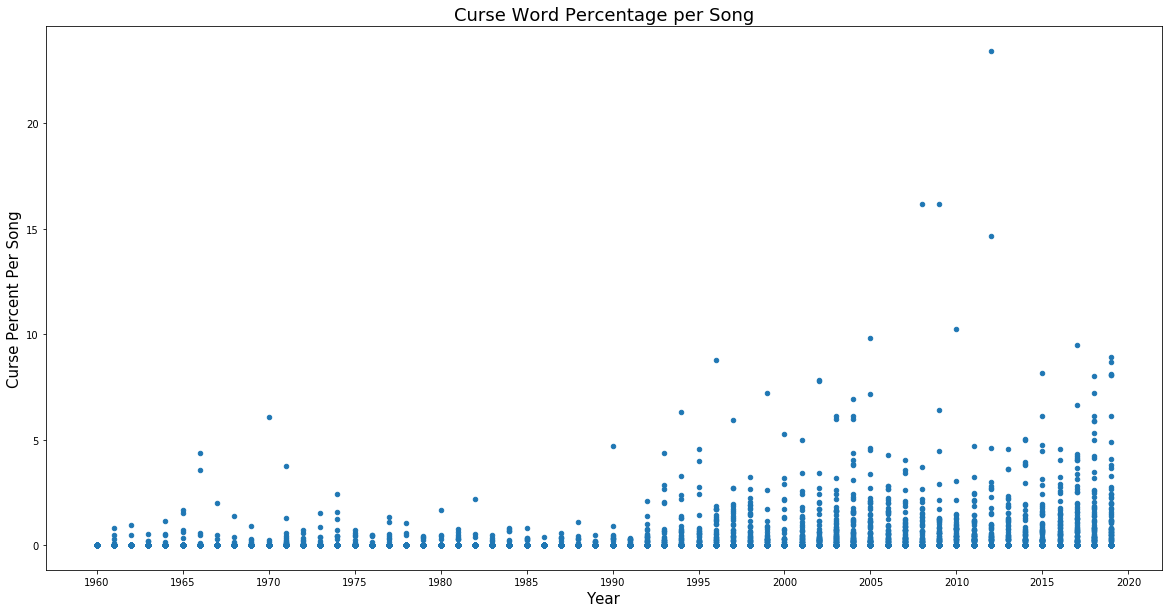

In [77]:
# persent of curse words per year (scatter plot)
plt4 = df_curse.plot(figsize=(20,10), x ='Year', y='Curse Percent', kind = 'scatter')
plt4.set_title("Curse Word Percentage per Song", fontsize = 18)
plt4.set_xticks(np.arange(1960, 2021, 5))
plt4.set_ylabel('Curse Percent Per Song', fontsize = 15)
plt4.set_xlabel('Year', fontsize = 15)
plt4

In this graph, each dot represents a song of that year. This measures each song and what percent of its words are curse words.  And so, looking at this graph, we can see a larger concentration of songs with a higher curse percentage starting from the 1990s and onto present day. We can see that from the 1960s to the early 1990s, each song had an average of 1% of it’s words as curse words, with a few songs that had a higher percentage of curse words. From the 1990s to present day, we can see an increase of curse percentage per song, averaging around 4-5%. And a few rare cases of songs that have a curse percentage over 10%. Hence, this increase in curse percentage helps to prove our hypothesis true. 

We can also see a couple outliers in this scatter plot, which we can print below:


In [81]:
df_curse.sort_values('Curse Percent', ascending=False)[:10]

,Rank,Song,Artist,Year,Lyrics,Total Curse Words,Total Words,Curse Percent,Genres
5257,57,Dance (A$$),Big Sean,2012,ass ass ass ass ass ass ass ass ass ass ass...,118,504,23.412698,"['detroit hip hop', 'hip hop', 'pop', 'pop rap..."
4816,16,Disturbia,Rihanna,2008,bum bum bedum bum bum bedum bum bum bum bedu...,81,501,16.167665,"['barbadian pop', 'dance pop', 'pop', 'post-te..."
4977,77,Disturbia,Rihanna,2009,bum bum bedum bum bum bedum bum bum bum bedu...,81,501,16.167665,"['barbadian pop', 'dance pop', 'pop', 'post-te..."
5245,45,Rack City,Tyga,2012,rack rack city bitch rack rack rack city bi...,70,478,14.644351,"['pop rap', 'rap', 'trap']"
5026,26,Sexy Bitch,David Guetta,2010,yes i can see her 'cause every girl here wann...,37,362,10.220994,"['dance pop', 'edm', 'pop', 'pop rap']"
4563,63,Wait (The Whisper Song),Ying Yang Twins,2005,hey how you doin' lil' mama let me whisper in...,54,551,9.800363,"['atl hip hop', 'crunk', 'dance pop', 'dirty s..."
5799,99,Look at Me!,XXXTentacion,2017,ayy i'm like bitch who is your mans can't ke...,32,337,9.495549,"['emo rap', 'miami hip hop']"
5976,76,My Type,Saweetie,2019,hennessy on my lips take a little sip privacy...,36,405,8.888889,"['cali rap', 'pop', 'pop rap', 'post-teen pop'..."
3689,89,Get Money,Junior M.A.F.I.A.,1996,fuck bitches get money fuck niggas get money...,60,684,8.771930,"['east coast hip hop', 'hardcore hip hop', 'hi..."
5993,93,Hot Girl Summer,Megan Thee Stallion,2019,real hot girl shit real real ass bitch give ...,75,867,8.650519,"['houston rap', 'pop', 'pop rap', 'trap queen']"


We can see that "Dance (A$$)" by Big Sean is the number one explicit song of BillBoard's Top 100 Charts ever, with a ~23.4 percent of the song being curse words. We can also see Rihanna's "Disturbia" hit BillBoard's Top 100 consecutively in 2008 then 2009.

### Average Number of Songs with Curse Words vs. Year 

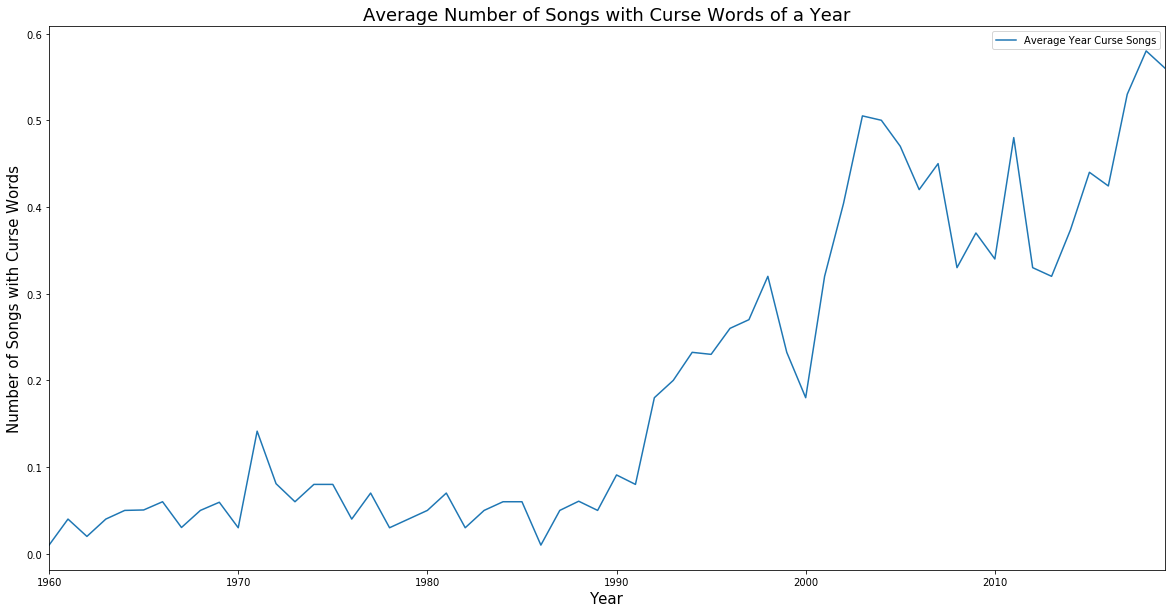

In [74]:
# Average songs with curse words per year (bar pot)
plt3 = df_curse_per_year.plot(figsize=(20,10), x ='Year', y='Average Year Curse Songs', kind = 'line')
plt3.set_title("Average Number of Songs with Curse Words of a Year", fontsize = 18)
plt3.set_ylabel('Number of Songs with Curse Words', fontsize = 15)
plt3.set_xlabel('Year', fontsize = 15)
plt3

This plot shows the trend of curse word usage in the Billboard Top 100 songs from 1960 to 2014. From this plot, we can see that there has been an overall increase in curse word usage in the top 100 songs over the years. It seems like there have been relatively few songs containing curse words from 1960-1990 but has been rapidly increasing ever since. We can also that in mid 2000s era and 2017-2019 that over half the songs in Billboard's Top 100 are explicit. This may be attributed to the rise of the internet as people become more exposed to explicit content and view it as normal as well as the rise of hip hop and its influence to pop culture.

### Genre vs. Average Curse Percent

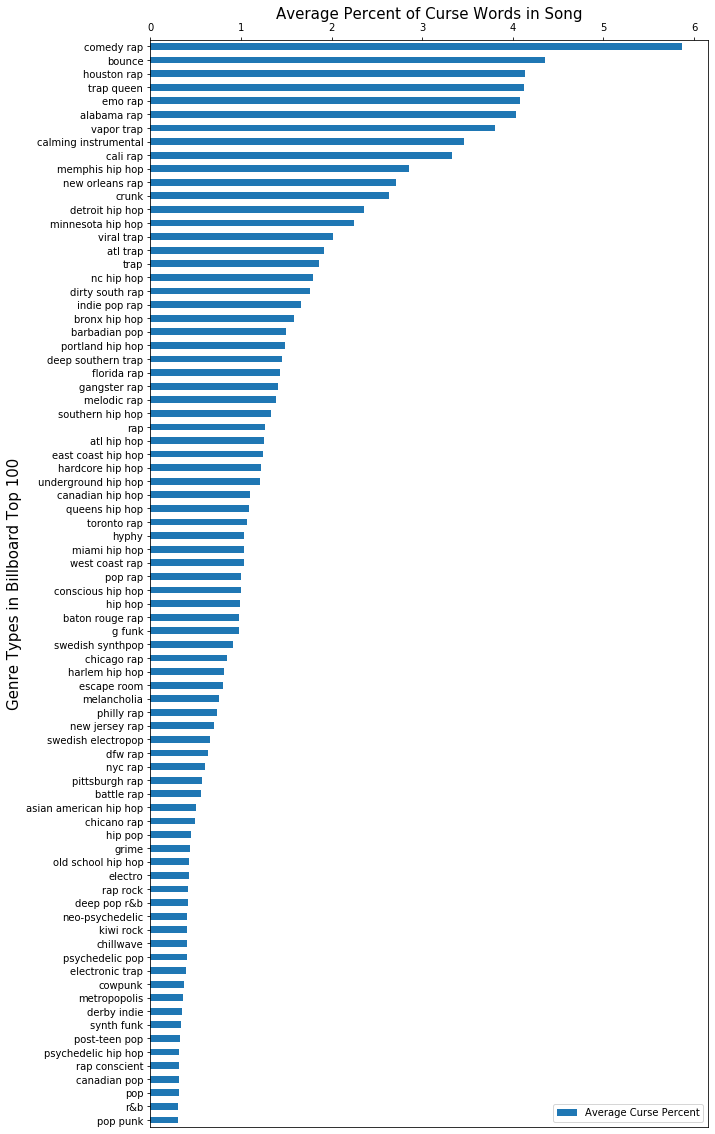

In [61]:
df_genre = df_genre.sort_values('Average Curse Percent', ascending=True)
plt5 = df_genre[-80:].plot(figsize=(10,20), x ='Genre', y='Average Curse Percent', kind = 'barh')
plt5.set_ylabel('Genre Types in Billboard Top 100', fontsize = 15)
plt5.set_xlabel('Average Percent of Curse Words in Song', fontsize = 15)
plt5.xaxis.set_ticks_position('top')
plt5.xaxis.set_label_position('top') 

This horizontal bar plot is a visualization of which 80 music genres had the highest average percentage of curse words in the songs. In this plot, you can see that there are different genre variations for rap and hip hop. Since these genres still belong under the same umbrella genres of rap and hip hop, we can say that these two genres have a higher frequency of curse words relative to the other genres in our dataset. This graph supports our hypothesis that hip hop and rap are the genres that have the most curse word usage when their songs appear in the Billboard Top 100 charts. 

### DataFace Linegraph of the % of Billboard Hot 100 Spots per Genre over Time

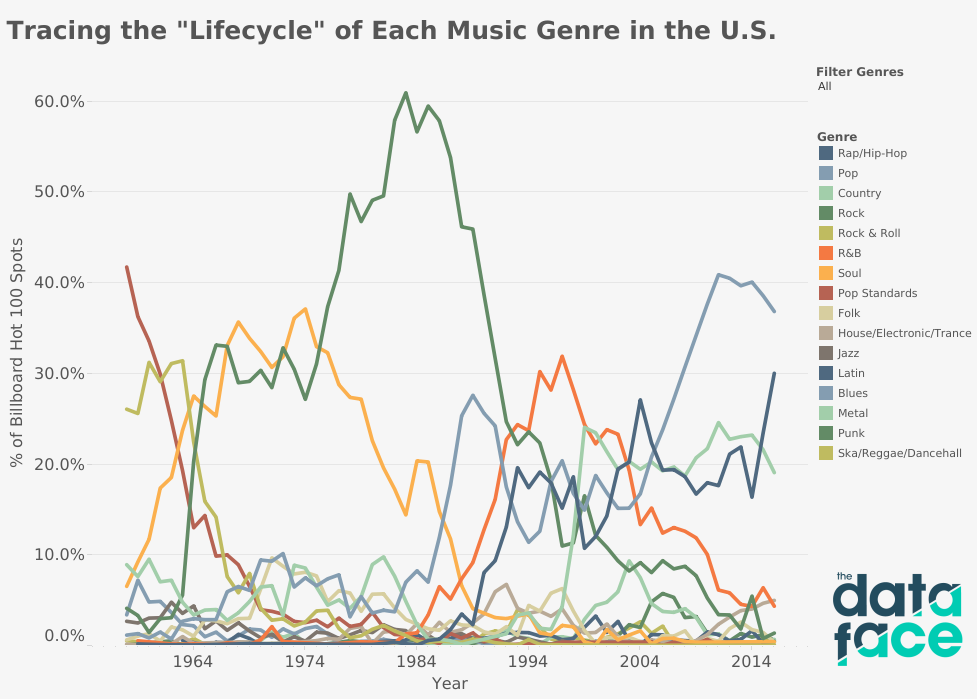

In [78]:
Image(filename='DataFace_GenrePopularity.png')

 This shows us the overall trend of how frequently songs from different genres appear in the Billboard Top 100 songs over time. We can see that from Data Face's graphthat there is a large increase of Rap/Hip Hop songs hitting the Billboard's Top 100 Chart specifically in the early 1990s - denoting the rise of the genre into pop culture, in the 2004 era, and a larger continual increase rising from 2014 towards the present.

Data Face's graph allows us to see the reasoning for the spikes of explicit songs in specific years. Earlier, we saw in the preceding plots that there was specific rise of curse word percentage's of songs beginning in the the early 1990s, spiking in the mid 2000s, and continually rising from 2014 to the present. Data Face's linegraph allows us to see that the genre of Rap/Hip Hop specifically rises in popularity during these times. We also saw in a previous plot, that the genres that are affiliated with Rap/Hip Hop contain the largest Average Percent of Curse Words in a song of such a genre. We can then clearly see that the genre of Hip Hop has made large contributions to the amount of curse words used in the popular musical content.

## Ethics & Privacy

While looking for data we could use to support our hypothesis, we only used information that was displayed publicly. We used public data of music chart rankings. More specifically, we used data provided by Billboard for the Year End Top 100 charts and also Wikipedia for older years which is also made publicly available. Song lyrics are also available to the public to view, provided by Genius lyrics. Using this public data does not breach data privacy or ethical concerns due to the fact that songs, artist names, lyrics, year of making, and their billboard ranking are encouraged to be public. 

Gathering song ranking data does not pose any privacy concerns because it is provided by Billboard. The Billboard Year End Top 100 chart contains data of the top 100 most popular songs of each year which is compiled by radio play, streaming data, and sales. For each top 100 song, the artist(s) and the rank is also provided. This data is used to commend the achievements of these artists therefore displaying their name does not pose a privacy concern. 


## Conclusions & Discussion

Our goal was to see how the amount of explicit language has changed in the past 60 years of each year's top 100 songs. We were also curious in observing whether the genre of a song correlated with the amount of explicit language it contains. Based off our data, we were able to see such a correlation and see that explicit language in popular musical content has increased over the time. We first saw a rise to number of curse words in our graph of "Total Number of Curse Words in Each Year". However, there were clear variations in the spikes in the plot, which bring us to our next plot "Average Percent of Curse Words in a Song". In this plot, we could see that the variation in explicit content have decreased due to incorporating the number of songs that actually have explicit language. We further took our observation into looking at the amount of songs in each year that actually had curse words in the "Average Number of Songs with Curse Words of a Year", and we also analyzed any outliers or points of interest in the "Curse Percent Per Song vs. Year". Finally, Utilizing the our 5th plot, "Genre vs. Average Curse Percent", and the Data Face graph, we were able to see that genres related to Hip Hop/Rap made large contributions to the amount of explicit language used in BillBoard's Top 100 List from 1990-Present, which shows large rises in explicit language usage in songs. 

In the end, we were able to prove our hypothesis correct. We were correct that the amount of explicit language has increased within the past 60 years, as seen in the plots on the rise of average curse word percentages in songs over the years as well as the amount of songs that contain curse words rising over the years. We hypothesized that the songs that fall within hip hop and rap genres will have more explicit language, and as shown from the plot "Genre vs. Average Curse Percent", songs that fall into hip hop related categories are in fact more explicit than the rest of the genres. The DataFace line graph allows us to see that such a genre as hip hop rises in the charts specifically at times when curse word usage in charted songs increase, as shown in the analysis. Thus, we can conclude that genre does influence the amount of explicit language in a song, as seen through the genre of hip hop and its effect on the Billboard Charts of the Internet age. We can also conclude that the amount of explicit language used has shifted - increasing over time.

Limitations:
Some of the limitations of our analysis were as follows:
- Due to the way Spotify's API return responses to searches for genres, we could not separate a single genre to a single song, and track genres over time. This is the reason why we had to utilize Data Face's graph instead of creating our own graph.
- Some songs in the df_curse DataFrame were instrumentals (has no lyrics). However, this would have limited impact on calculating averages.

Continuation of the Project:
We believe there could be further analysis to be done on the Dataframes and even better results to be found. Some of them include being able to single out a specific genre for each song out of the list of genres for the specific song. This could actually track much more data in terms of influence of other genres. This would allow analysis of relations to even external events that happened during different time periods.


## Team Contributions
- Winnie: web scraping, data research, data plotting, data analysis
- Evelynne: background, data analysis, ethics and privacy
- Sean: web scraping, data research, data cleaning, plotting, data analysis
- Jack: web scraping, data cleaning, data plotting
- Jeremiah: web scraping, data cleaning, data plotting, API usage, data analysis